In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('230423houseprice.csv')

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
type(df.isna().sum())

pandas.core.series.Series

In [7]:
total_missing = df.isna().sum().sort_values(ascending=False)
percentage_missing = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)
missing_df = pd.concat([total_missing,percentage_missing], axis =1,keys=['Total Missing','Percentage Missing'])
missing_df.head(25)

,Total Missing,Percentage Missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Drop columns with missing data

In [ ]:
#df = df.drop(missing_df[missing_df['Total Missing']>10].index, 1)

In [19]:
columns_drop = missing_df[missing_df['Total Missing']>10].index
columns_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1'],
      dtype='object')

In [20]:
type(columns_drop)

pandas.core.indexes.base.Index

In [22]:
df = df.drop(columns_drop, axis =1)
df.shape

(1460, 65)

In [24]:
df.isna().sum().max()

8

Fill value before

In [25]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(method='bfill')
df['MasVnrType'] = df['MasVnrType'].fillna(method='bfill')
df['Electrical'] = df['Electrical'].fillna(method='bfill')

In [26]:
df.isna().sum().max()

0

In [27]:
df.shape

(1460, 65)

Statistical Summary

In [28]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.680822,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.190771,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Data Analysis - Univariate (here categorical unordered univariate analysis in this example)

Barcharts

In [30]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


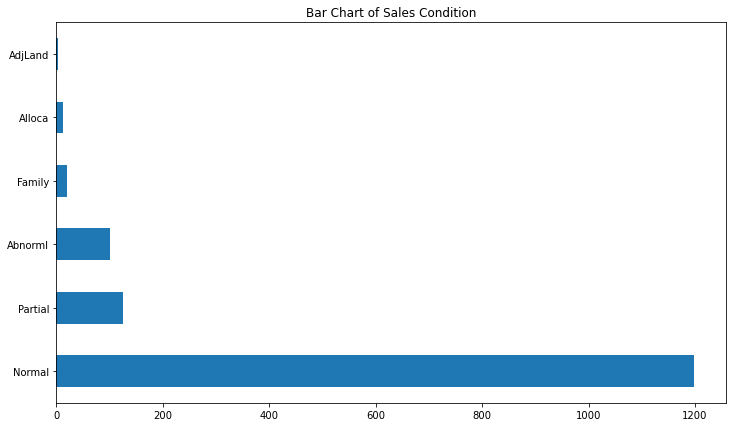

In [31]:
plt.figure(figsize=(12,7))
df.SaleCondition.value_counts().plot.barh()
plt.title("Bar Chart of Sales Condition")
plt.show()

Histogram

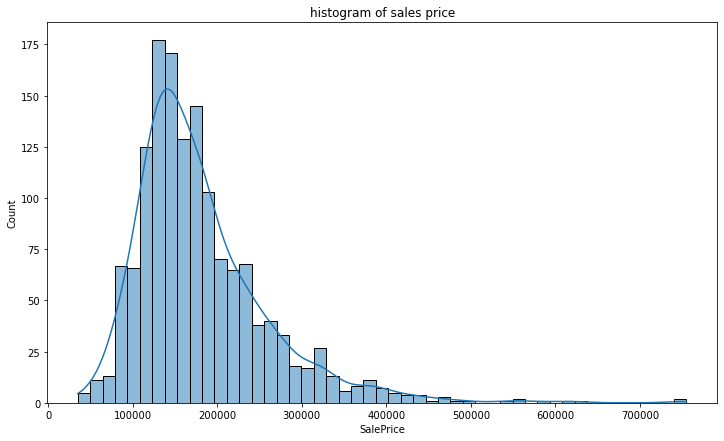

In [35]:
plt.figure(figsize=(12,7))
sns.histplot(df.SalePrice,kde=True)
plt.title("histogram of sales price")
plt.show()

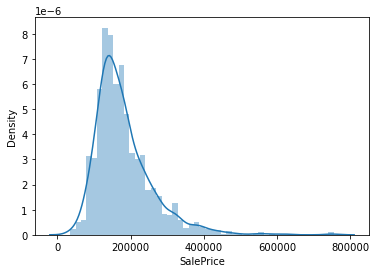

In [33]:
sns.distplot(df.SalePrice)
plt.show()

In [38]:
print(f'Skewness of SalePrice is : {df.SalePrice.skew()}')
print(f'Kurtosis of Saleprice is: {df.SalePrice.kurt()}')

Skewness of SalePrice is : 1.8828757597682129
Kurtosis of Saleprice is: 6.536281860064529


In [39]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Bivariate Analysis

numeric-numeric bivariate

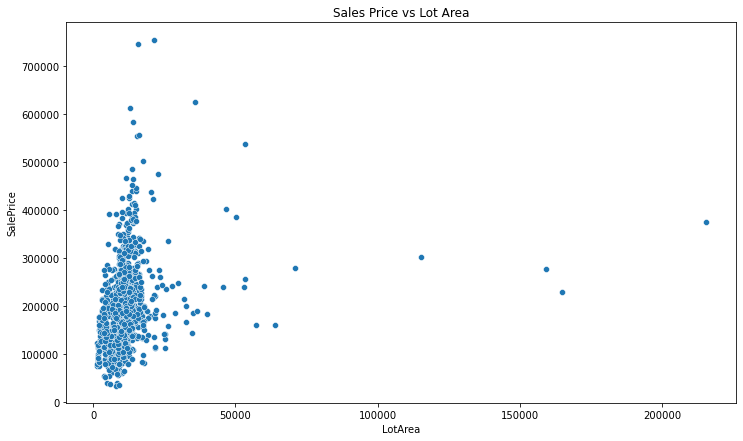

In [41]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='LotArea',y='SalePrice',data=df)
plt.title('Sales Price vs Lot Area')
plt.show()

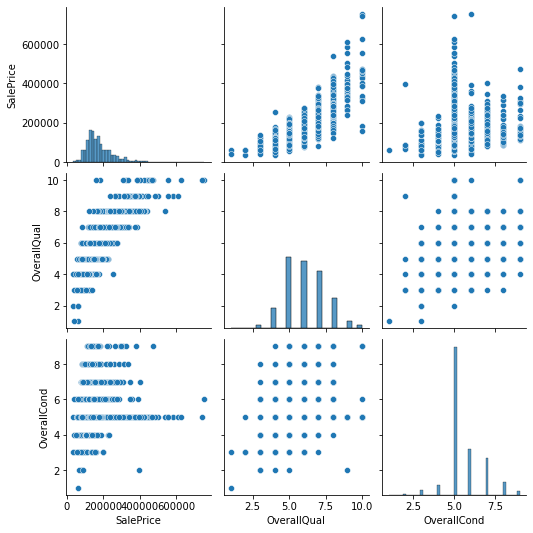

In [42]:
sns.pairplot(data=df, vars = ['SalePrice','OverallQual','OverallCond'])
plt.show() #multivariate since we analyse combination of three var

Correlation Heatmap

In [43]:
df[['SalePrice','OverallQual','OverallCond']].corr()

,SalePrice,OverallQual,OverallCond
SalePrice,1.000000,0.790982,-0.077856
OverallQual,0.790982,1.000000,-0.091932
OverallCond,-0.077856,-0.091932,1.000000


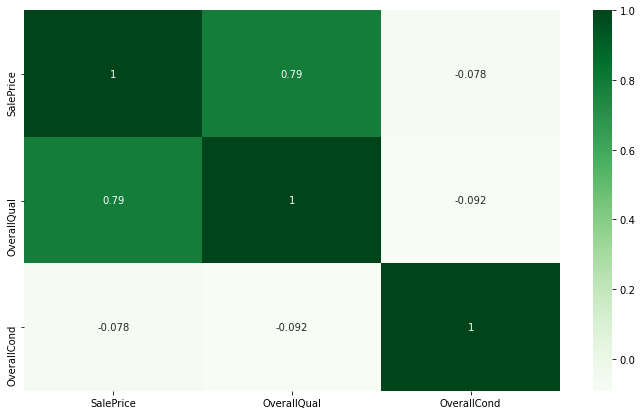

In [46]:
plt.figure(figsize=(12,7))
sns.heatmap(df[['SalePrice','OverallQual','OverallCond']].corr(), annot =True,cmap="Greens")
plt.show()#multivariate since we analyse combination of three var

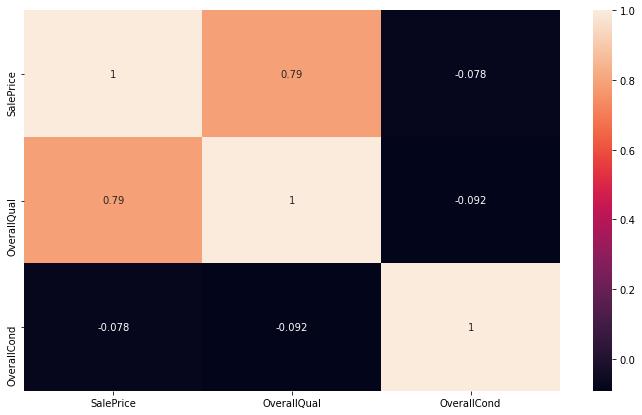

In [48]:
plt.figure(figsize=(12,7))
sns.heatmap(df[['SalePrice','OverallQual','OverallCond']].corr(), annot=True)
plt.show()#multivariate since we analyse combination of three var

Boxplot

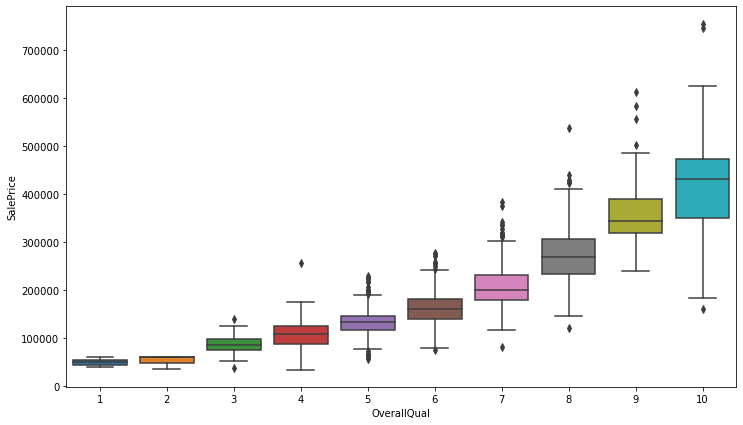

In [44]:
plt.figure(figsize=(12,7))
sns.boxplot(x='OverallQual',y='SalePrice',data=df)
plt.show()

numeric-categorical bivariate

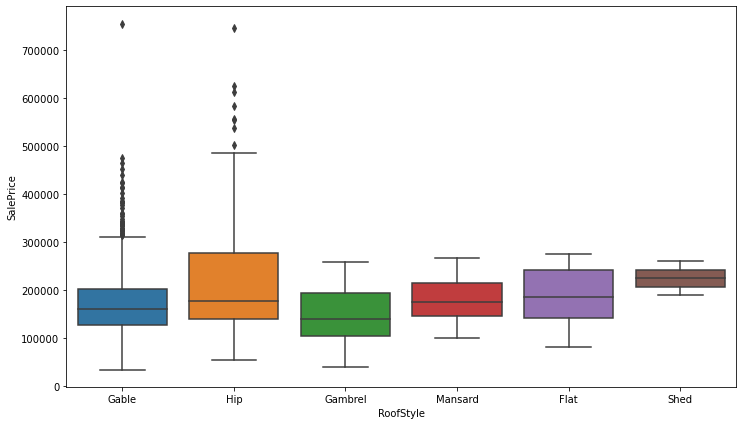

In [49]:
plt.figure(figsize=(12,7))
sns.boxplot(x='RoofStyle',y='SalePrice',data=df)
plt.show()

multivariate analysis

we did this before

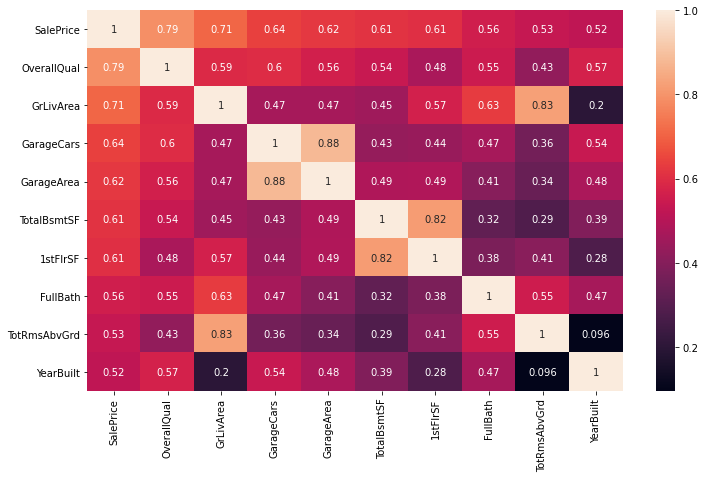

In [50]:
cols = df.corr().nlargest(10,'SalePrice')['SalePrice'].index #10 most features that correlate with the SalePrice
cm = df[cols].corr()

plt.figure(figsize=(12,7))
sns.heatmap(cm, annot = True)
plt.show()

In [56]:
df.corr().nlargest(10,'SalePrice')

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.263843,0.790982,-0.077856,0.522897,0.507101,0.472645,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.405996,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390577,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.154871,0.600671,-0.185758,0.537850,0.420622,0.361997,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.180403,0.562022,-0.151521,0.478954,0.371600,0.369634,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.359972,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.299475,0.476224,-0.144203,0.281986,0.240379,0.340098,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276268,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.190015,0.427452,-0.057583,0.095589,0.191740,0.282208,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.312744,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [52]:
cols = df.corr().nlargest(10,'SalePrice').index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

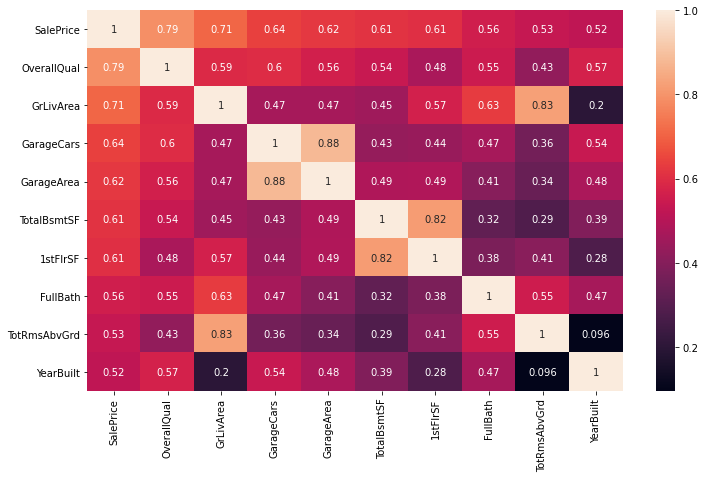

In [53]:
cm = df[cols].corr()

plt.figure(figsize=(12,7))
sns.heatmap(cm, annot = True)
plt.show()

In [54]:
df.mean().nlargest(10)

SalePrice       180921.195890
LotArea          10516.828082
YrSold            2007.815753
YearRemodAdd      1984.865753
YearBuilt         1971.267808
GrLivArea         1515.463699
1stFlrSF          1162.626712
TotalBsmtSF       1057.429452
Id                 730.500000
BsmtUnfSF          567.240411
dtype: float64

In [60]:
df.values

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

Multicollinearity

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif_cal_df =df[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt']]

In [64]:
vif_df = pd.DataFrame()

vif_df['Columns'] = vif_cal_df.columns
vif_df['VIF'] = [variance_inflation_factor(vif_cal_df.values,i) for i in range(vif_cal_df.shape[1])]

In [65]:
vif_df

,Columns,VIF
0,OverallQual,44.718362
1,GrLivArea,15.258650
2,GarageCars,10.799932
3,TotalBsmtSF,10.176010
4,YearBuilt,22.274153


<function matplotlib.pyplot.show(close=None, block=None)>

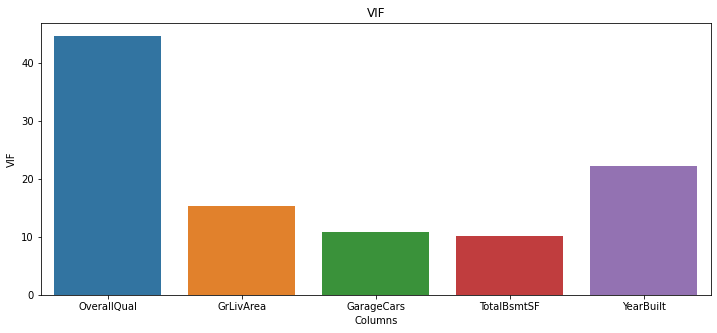

In [67]:
plt.figure(figsize=(12,5))
sns.barplot(x='Columns',y='VIF',data = vif_df)
plt.title("VIF")
plt.show

In [70]:
df.isna()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
